<a href="https://colab.research.google.com/github/Sarvagy-Jain/SVM-Parameter-Optimisation/blob/main/SVM_PARAMETER_OPTIMISATION_USING_RANDOMIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.svm import SVC as svc 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import StratifiedKFold
import random

In [2]:
df = pd.read_csv("frog.csv")

In [3]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,60
7193,1.0,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,60


In [4]:
l = []
lk =[]
ln = []
le = []
dim = []
lxt = []
lyt = []

In [5]:
def f(k,n,e,X_train,X_test,y_train,y_test):
    model = svc(kernel=k,C=n,gamma=e)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    a = accuracy_score(y_test,y_pred)
    return a

In [6]:
def r(dfa):
    best_accuracy = 0
    best_kernel = ""
    best_C= 0
    best_gamma = 0
    it = 1000
    kernal_list = ['rbf','sigmoid','linear','poly',]
    X = dfa.iloc[: , 0:-1 ]
    Y = dfa['RecordID']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25 ,random_state=42)
    lxt.append(X_train)
    lyt.append(y_train)
    lit=[]
    for i in range(it):
        n = random.random()
        e = random.random()
        k = random.choice(kernal_list)
        a = f(k,n,e, X_train, X_test, y_train, y_test)
        if i%10==0:
            lit.append(a)
        if(best_accuracy < a):
            best_accuracy = a
            best_kernel = k
            best_C = n
            best_gamma = e  
    l.append(best_accuracy)
    lk.append(best_kernel)
    ln.append(best_C)
    le.append(best_gamma)
    dim.append(lit)
    print(best_accuracy)    

In [7]:
i=0
while i<10:
    i+=1
    data = df.sample(n=100)
    r(data)  

0.44
0.4
0.52
0.48
0.6
0.52
0.44
0.56
0.44
0.36


In [8]:
Sample_Number = pd.DataFrame(['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10'])

In [9]:
import pandas as pd
ans=pd.DataFrame(columns=['Best Accuracy','Best Kernel','Best C','Best Gamma'])
ans['Best Accuracy'],ans['Best Kernel'],ans['Best C'],ans['Best Gamma']=l,lk,ln,le


In [10]:
Sample_table = pd.concat([Sample_Number,ans],axis = 1)
Sample_table.columns = ['Samples', 'Best Accuracy', 'Best Kernel','Best C','Best Gamma']

In [11]:
file_name = 'result.xlsx'
Sample_table.to_excel(file_name)

In [12]:
mx = 0;
ind = -1;
for i in range(10):
    if mx < Sample_table.at[i, 'Best Accuracy']:
        ind = i
        mx = Sample_table.at[i, 'Best Accuracy']

In [13]:
y_plot=dim[ind]

In [14]:
x_plot=list(range(0, 1000,10))

In [15]:
Sample_table

,Samples,Best Accuracy,Best Kernel,Best C,Best Gamma
0,S1,0.44,poly,0.902740,0.929440
1,S2,0.40,poly,0.965276,0.992175
2,S3,0.52,poly,0.682798,0.988027
3,S4,0.48,poly,0.723973,0.930850
4,S5,0.60,poly,0.899134,0.895362
5,S6,0.52,poly,0.729283,0.941030
6,S7,0.44,poly,0.912926,0.939486
7,S8,0.56,poly,0.837752,0.832188
8,S9,0.44,poly,0.845310,0.999787
9,S10,0.36,poly,0.844352,0.999244


In [16]:
ind

4

In [17]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=Sample_table.at[i, 'Best Kernel'], 
                                                        C=Sample_table.at[i, 'Best C'],
                                                        gamma=Sample_table.at[i, 'Best Gamma'],
                                                        max_iter = 1000), lxt[i],lyt[i], cv=2, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 37 instead of 50.
  warnings.warn(


In [18]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

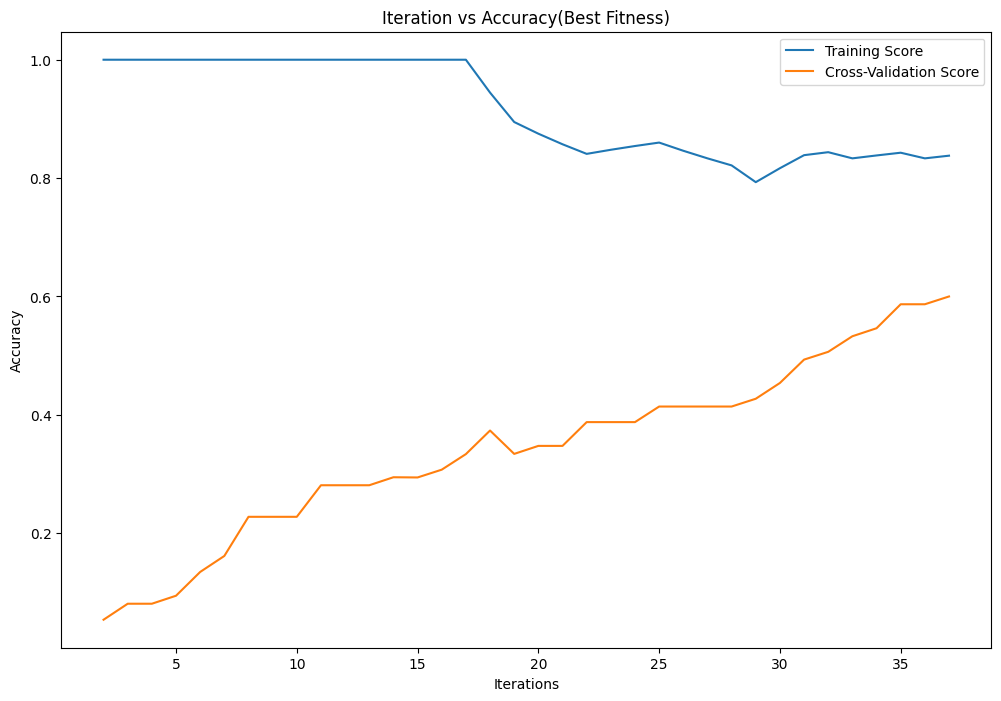

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title("Iteration vs Accuracy(Best Fitness)") 
plt.legend(loc="best")
plt.show()


In [20]:
plt.savefig('learn.png')

<Figure size 640x480 with 0 Axes>